In [1]:
import pandas as pd                       #to perform data manipulation and analysis
import numpy as np                        #to cleanse data
from datetime import datetime             #to manipulate dates
from xlrd.sheet import empty_cell

In [31]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()


,Date,Transaction,Amount
0,10/13/2021,PAPA JOHN'S PIZZA #12 289-270-2550 ON,-18.22
1,10/13/2021,ESSO CIRCLE K 0302 GUELPH ON,-40.00
2,10/13/2021,ROYAL CITY TENNIS CLUB Guelph ON,-17.40
3,10/14/2021,SOBEYS #852 KITCHENER KITCHENER ON,-8.02
4,10/15/2021,MB-CREDIT CARD/LOC PAY. FROM - *****...,500.00


<b><FONT COLOR= blue>Change amount to number and remove any positive only to keep expenses</b>

In [4]:
df['Amount']=pd.to_numeric(df['Amount'])

In [5]:
df=df[df['Amount']<0]

In [6]:
df.head()

,Date,Transaction,Amount
0,10/13/2021,PAPA JOHN'S PIZZA #12 289-270-2550 ON,-18.22
1,10/13/2021,ESSO CIRCLE K 0302 GUELPH ON,-40.00
2,10/13/2021,ROYAL CITY TENNIS CLUB Guelph ON,-17.40
3,10/14/2021,SOBEYS #852 KITCHENER KITCHENER ON,-8.02
5,10/16/2021,PAPA GIUSEPPE`S PORT CREDMISSISSAUGA ON,-75.98


In [7]:
df.dtypes

Date            object
Transaction     object
Amount         float64
dtype: object

<b><FONT COLOR= blue>Update the amounts as positive to avoid confusion</b>

In [14]:
df['Amount']=df['Amount']*(-1)

In [15]:
df.head()


,Date,Transaction,Amount,Category
0,10/13/2021,PAPA JOHN'S PIZZA #12 289-270-2550 ON,18.22,
1,10/13/2021,ESSO CIRCLE K 0302 GUELPH ON,40.00,
2,10/13/2021,ROYAL CITY TENNIS CLUB Guelph ON,17.40,
3,10/14/2021,SOBEYS #852 KITCHENER KITCHENER ON,8.02,
5,10/16/2021,PAPA GIUSEPPE`S PORT CREDMISSISSAUGA ON,75.98,


<b><FONT COLOR= blue>Adding a column called Category</b>

In [16]:
df['Category']=""
    

<b><FONT COLOR= blue>Iterate through each row</b>

In [12]:
df['Transaction'] = df['Transaction'].astype('string')
df['Category'] = df['Category'].astype('string')

In [26]:
df.dtypes

Date            object
Transaction     string
Amount         float64
Category        string
dtype: object

In [17]:
df.Amount.sum()

2588.94

<b><FONT COLOR= blue>Categorizing every transaction</b>

In [19]:
df.loc[df['Transaction'].str.contains('PIZZA|JERK|A&W|TIM|PAPA|ROUTE|BASKIN|JUICE|HJMAC|BK|STARBUCKS|SKIP|DONUT'), 'Category'] = 'FOOD'
df.loc[df['Transaction'].str.contains('ESSO|PETRO'), 'Category'] = 'GAS'
df.loc[df['Transaction'].str.contains('TENNIS'), 'Category'] = 'ENTERTAINMENT'
df.loc[df['Transaction'].str.contains('AMAZON|REXALL'), 'Category'] = 'NECESSITY'
df.loc[df['Transaction'].str.contains('MAZDA'), 'Category'] = 'CAR'
df.loc[df['Transaction'].str.contains('SOBEYS|MARKET'), 'Category'] = 'GROCERY'
df.loc[df['Transaction'].str.contains('LCBO'), 'Category'] = 'ALCOHOL'
df.loc[df['Transaction'].str.contains('GOOGLE|SEOUL'), 'Category'] = 'SUBSCRIPTION'
df.loc[df['Transaction'].str.contains('LUSH|NIKE'), 'Category'] = 'SHOPPING'
df.loc[df['Transaction'].str.contains('VIRGIN|FIDO|ROGERS'), 'Category'] = 'BILL'

In [18]:
df

,Date,Transaction,Amount,Category
0,10/13/2021,PAPA JOHN'S PIZZA #12 289-270-2550 ON,18.22,
1,10/13/2021,ESSO CIRCLE K 0302 GUELPH ON,40.00,
2,10/13/2021,ROYAL CITY TENNIS CLUB Guelph ON,17.40,
3,10/14/2021,SOBEYS #852 KITCHENER KITCHENER ON,8.02,
5,10/16/2021,PAPA GIUSEPPE`S PORT CREDMISSISSAUGA ON,75.98,
6,10/16/2021,A&W #4851 MILTON MILTON ON,20.88,
7,10/16/2021,ACHILLES MAZDA OF MILTON MILTON ON,897.94,
8,10/16/2021,WINNIES JERK 00-080378388MILTON ON,13.56,
9,10/17/2021,LUSH FAIRVIEW PARK MAL LUKITCHENER ON,17.97,
10,10/18/2021,REXALL PHARMACY #6964 MILMILTON ON,17.30,


In [20]:
df.groupby('Category').sum()

,Amount
Category,
,25.09
ALCOHOL,72.25
BILL,210.58
CAR,897.94
ENTERTAINMENT,34.80
FOOD,450.13
GAS,390.00
GROCERY,165.73
NECESSITY,190.14


In [58]:
Categorylist=list(df.Category.unique())
Categorylist

['FOOD',
 'GAS',
 'ENTERTAINMENT',
 'GROCERY',
 'CAR',
 'SHOPPING',
 'NECESSITY',
 'SUBSCRIPTION',
 'ALCOHOL',
 'BILL',
 '']

<b><FONT COLOR= blue>If any blank cells exist in Category column, Get those rows</b>

In [21]:
df[df['Category'].eq('')]

,Date,Transaction,Amount,Category
45,11/7/2021,CDN TIRE STORE 0039430000MILTON ON (APP...,7.90,
52,11/12/2021,Mind Games TPO Mind GamesHalton Hills ON,16.94,
53,11/12/2021,CITY OF BURLINGTON NORTH YORK ON,0.25,


<b><FONT COLOR= blue>Fill in the empty Category</b>

In [22]:
df.loc[df['Transaction'].str.contains('Games'), 'Category'] = 'ENTERTAINMENT'
df.loc[df['Transaction'].str.contains('TIRE|CITY'), 'Category'] = 'NECESSITY'


In [23]:
df

,Date,Transaction,Amount,Category
0,10/13/2021,PAPA JOHN'S PIZZA #12 289-270-2550 ON,18.22,FOOD
1,10/13/2021,ESSO CIRCLE K 0302 GUELPH ON,40.00,GAS
2,10/13/2021,ROYAL CITY TENNIS CLUB Guelph ON,17.40,NECESSITY
3,10/14/2021,SOBEYS #852 KITCHENER KITCHENER ON,8.02,GROCERY
5,10/16/2021,PAPA GIUSEPPE`S PORT CREDMISSISSAUGA ON,75.98,FOOD
6,10/16/2021,A&W #4851 MILTON MILTON ON,20.88,FOOD
7,10/16/2021,ACHILLES MAZDA OF MILTON MILTON ON,897.94,CAR
8,10/16/2021,WINNIES JERK 00-080378388MILTON ON,13.56,FOOD
9,10/17/2021,LUSH FAIRVIEW PARK MAL LUKITCHENER ON,17.97,SHOPPING
10,10/18/2021,REXALL PHARMACY #6964 MILMILTON ON,17.30,NECESSITY


<b><FONT COLOR= blue>Changing the Category column to a list</b>

In [25]:
Categorylist=list(df.Category.unique())

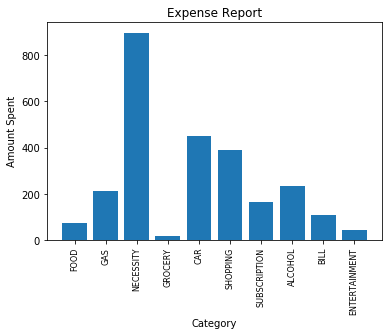

In [27]:
import matplotlib.pyplot as plt

plt.bar(Categorylist,df.groupby('Category').sum()['Amount'])
plt.title('Expense Report')
plt.ylabel('Amount Spent')
plt.xlabel('Category')
plt.xticks(Categorylist, rotation='vertical', size=8)
plt.show()